In [127]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
import cleaner as cln
import constants as const

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df.describe()

,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price,price
count,1.678400e+04,16590.000000,16205.000000,14447.000000,16731.000000,16608.000000,16351.000000,15893.000000,14630.000000,15595.000000,13060.000000,1.674300e+04,16500.000000,0.0,1.678400e+04
mean,1.009717e+06,2014.212417,1554.616230,133.950647,2086.423944,2.033297,14489.055104,41336.704524,1358.951880,44208.937865,72539.375651,3.896792e+04,38636.758242,NaN,1.129102e+05
std,2.644722e+04,8.771572,820.442216,74.294299,1126.062034,1.362351,19367.989982,16553.755676,1187.558721,42816.473242,50985.924208,4.445251e+04,59749.028200,NaN,1.342478e+05
min,3.652410e+05,1933.000000,2.000000,40.500000,0.000000,1.000000,2680.000000,10.000000,50.000000,97.000000,1.000000,8.880000e+02,63.000000,NaN,2.100000e+03
25%,1.002488e+06,2011.000000,1280.000000,90.000000,1497.000000,1.000000,8630.000000,31335.000000,684.000000,24985.000000,32661.500000,1.919300e+04,12614.250000,NaN,5.700000e+04
50%,1.017508e+06,2016.000000,1440.000000,110.000000,1797.000000,2.000000,10610.000000,40512.000000,976.000000,35556.000000,65801.500000,2.708400e+04,21698.000000,NaN,8.010000e+04
75%,1.025184e+06,2018.000000,1680.000000,147.000000,2356.000000,3.000000,14870.000000,51600.000000,1369.000000,50403.500000,104000.000000,4.068750e+04,42642.750000,NaN,1.209250e+05
max,1.031324e+06,2925.000000,20980.000000,552.000000,15681.000000,6.000000,865610.000000,97889.000000,12375.000000,653862.000000,740459.000000,1.150000e+06,858230.000000,NaN,2.920500e+06


In [130]:
df = pd.read_csv(const.TRAIN_PATH)

# Handling date function with a manual call
df = cln.handle_date_fields(df,is_test=True)

# Handling make from title checkout
df = cln.handle_make(df)

# Handling fuel_type from data + scraper
df = cln.handle_fuel_type_using_other_cols(df)
df = cln.handle_fuel_type_using_scraped_data(df)

# Dropping definite columns that aren't going to come in use
df.drop(columns=["opc_scheme","indicative_price","eco_category"], inplace=True)

df.isnull().sum()

listing_id            0
title                 0
make                  0
model                 0
description         345
manufactured          0
type_of_vehicle       0
category              0
transmission          0
curb_weight         579
power              2337
fuel_type          2332
engine_cap           53
no_of_owners        176
depreciation        433
coe                 891
road_tax           2154
dereg_value        1189
mileage            3724
omv                  41
arf                 284
features            459
accessories        2813
price                 0
registered_date       0
car_age               0
dtype: int64

In [131]:
df_cl = df.copy()
df_cl = cln.handle_make_model(df_cl)

In [132]:
df_cl.drop(columns =["listing_id", "title", "make","model","description","manufactured","fuel_type","accessories","features","registered_date"], inplace=True)

In [133]:
df_cl.isnull().sum()

type_of_vehicle       0
category              0
transmission          0
curb_weight         579
power              2337
engine_cap           53
no_of_owners        176
depreciation        433
coe                 891
road_tax           2154
dereg_value        1189
mileage            3724
omv                  41
arf                 284
price                 0
car_age               0
make_model            0
dtype: int64

In [134]:
df_cl.corr()

,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,price,car_age,make_model
curb_weight,1.000000,0.669867,0.799242,-0.007923,0.110635,0.049650,0.640940,0.103412,0.002556,0.274464,0.115930,0.138473,0.022927,0.138303
power,0.669867,1.000000,0.884905,0.144118,0.591131,0.251833,0.842316,0.699425,-0.139015,0.849986,0.843883,0.769550,-0.003482,0.775805
engine_cap,0.799242,0.884905,1.000000,0.126226,0.347337,0.048805,0.966132,0.303947,-0.004413,0.619083,0.478709,0.418161,0.059730,0.452576
no_of_owners,-0.007923,0.144118,0.126226,1.000000,0.020780,-0.163647,0.284439,-0.206982,0.532323,0.127511,0.104119,-0.092642,0.389461,0.028912
depreciation,0.110635,0.591131,0.347337,0.020780,1.000000,0.281593,0.489024,0.555946,-0.158536,0.678950,0.656705,0.631857,-0.023237,0.642424
coe,0.049650,0.251833,0.048805,-0.163647,0.281593,1.000000,0.110904,0.331103,-0.005319,0.160858,0.234678,0.047125,-0.093206,0.138883
road_tax,0.640940,0.842316,0.966132,0.284439,0.489024,0.110904,1.000000,0.459083,0.018472,0.816899,0.769150,0.610232,0.092518,0.696376
dereg_value,0.103412,0.699425,0.303947,-0.206982,0.555946,0.331103,0.459083,1.000000,-0.376528,0.712710,0.849308,0.894838,-0.197490,0.769315
mileage,0.002556,-0.139015,-0.004413,0.532323,-0.158536,-0.005319,0.018472,-0.376528,1.000000,-0.149942,-0.170006,-0.387148,0.354204,-0.242273
omv,0.274464,0.849986,0.619083,0.127511,0.678950,0.160858,0.816899,0.712710,-0.149942,1.000000,0.938438,0.804580,-0.003968,0.854755


/tmp/ipykernel_508259/4196938893.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_cl.corr(), dtype=np.bool)


(14.5, -0.5)

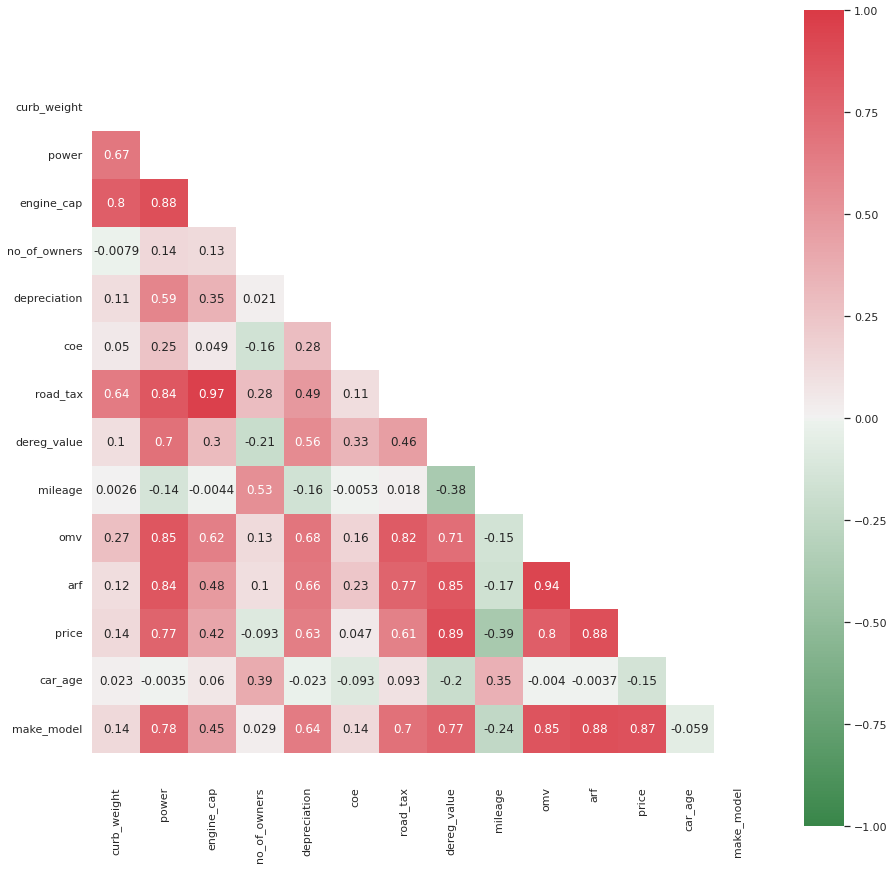

In [135]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_cl.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_cl.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [136]:
df_cl_1 = df_cl.drop(columns=["coe", "no_of_owners"])
df_cl_1 = df_cl_1.dropna()
# power,  - needs to be extrapolated

/tmp/ipykernel_508259/2616998087.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_cl_1.corr(), dtype=np.bool)


(12.5, -0.5)

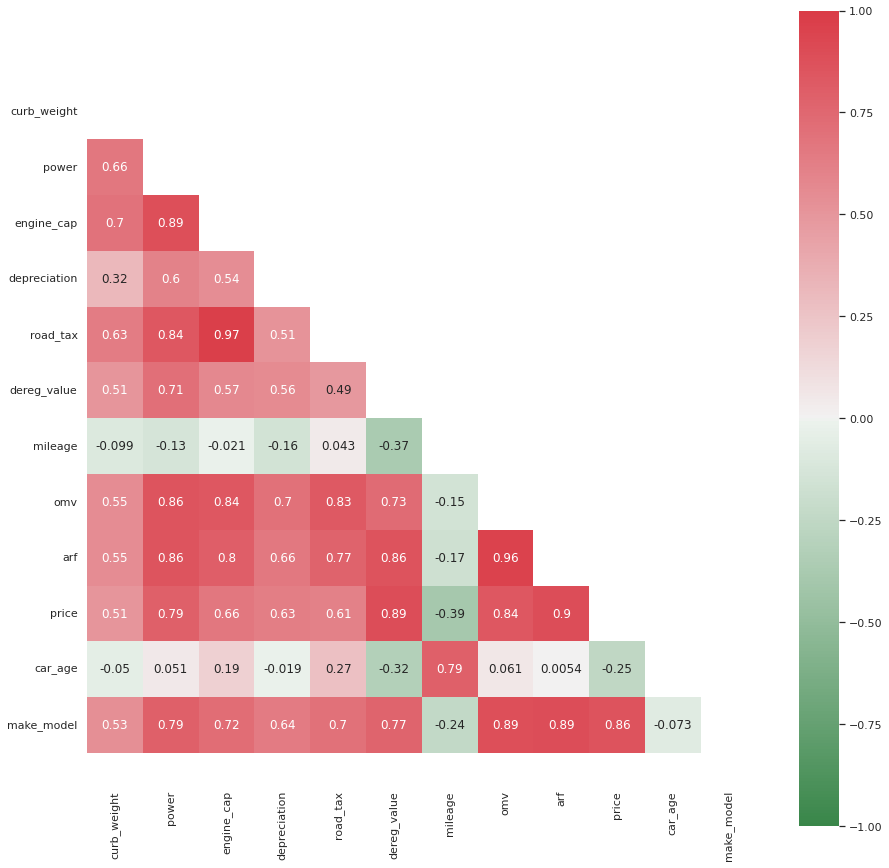

In [137]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_cl_1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_cl_1.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

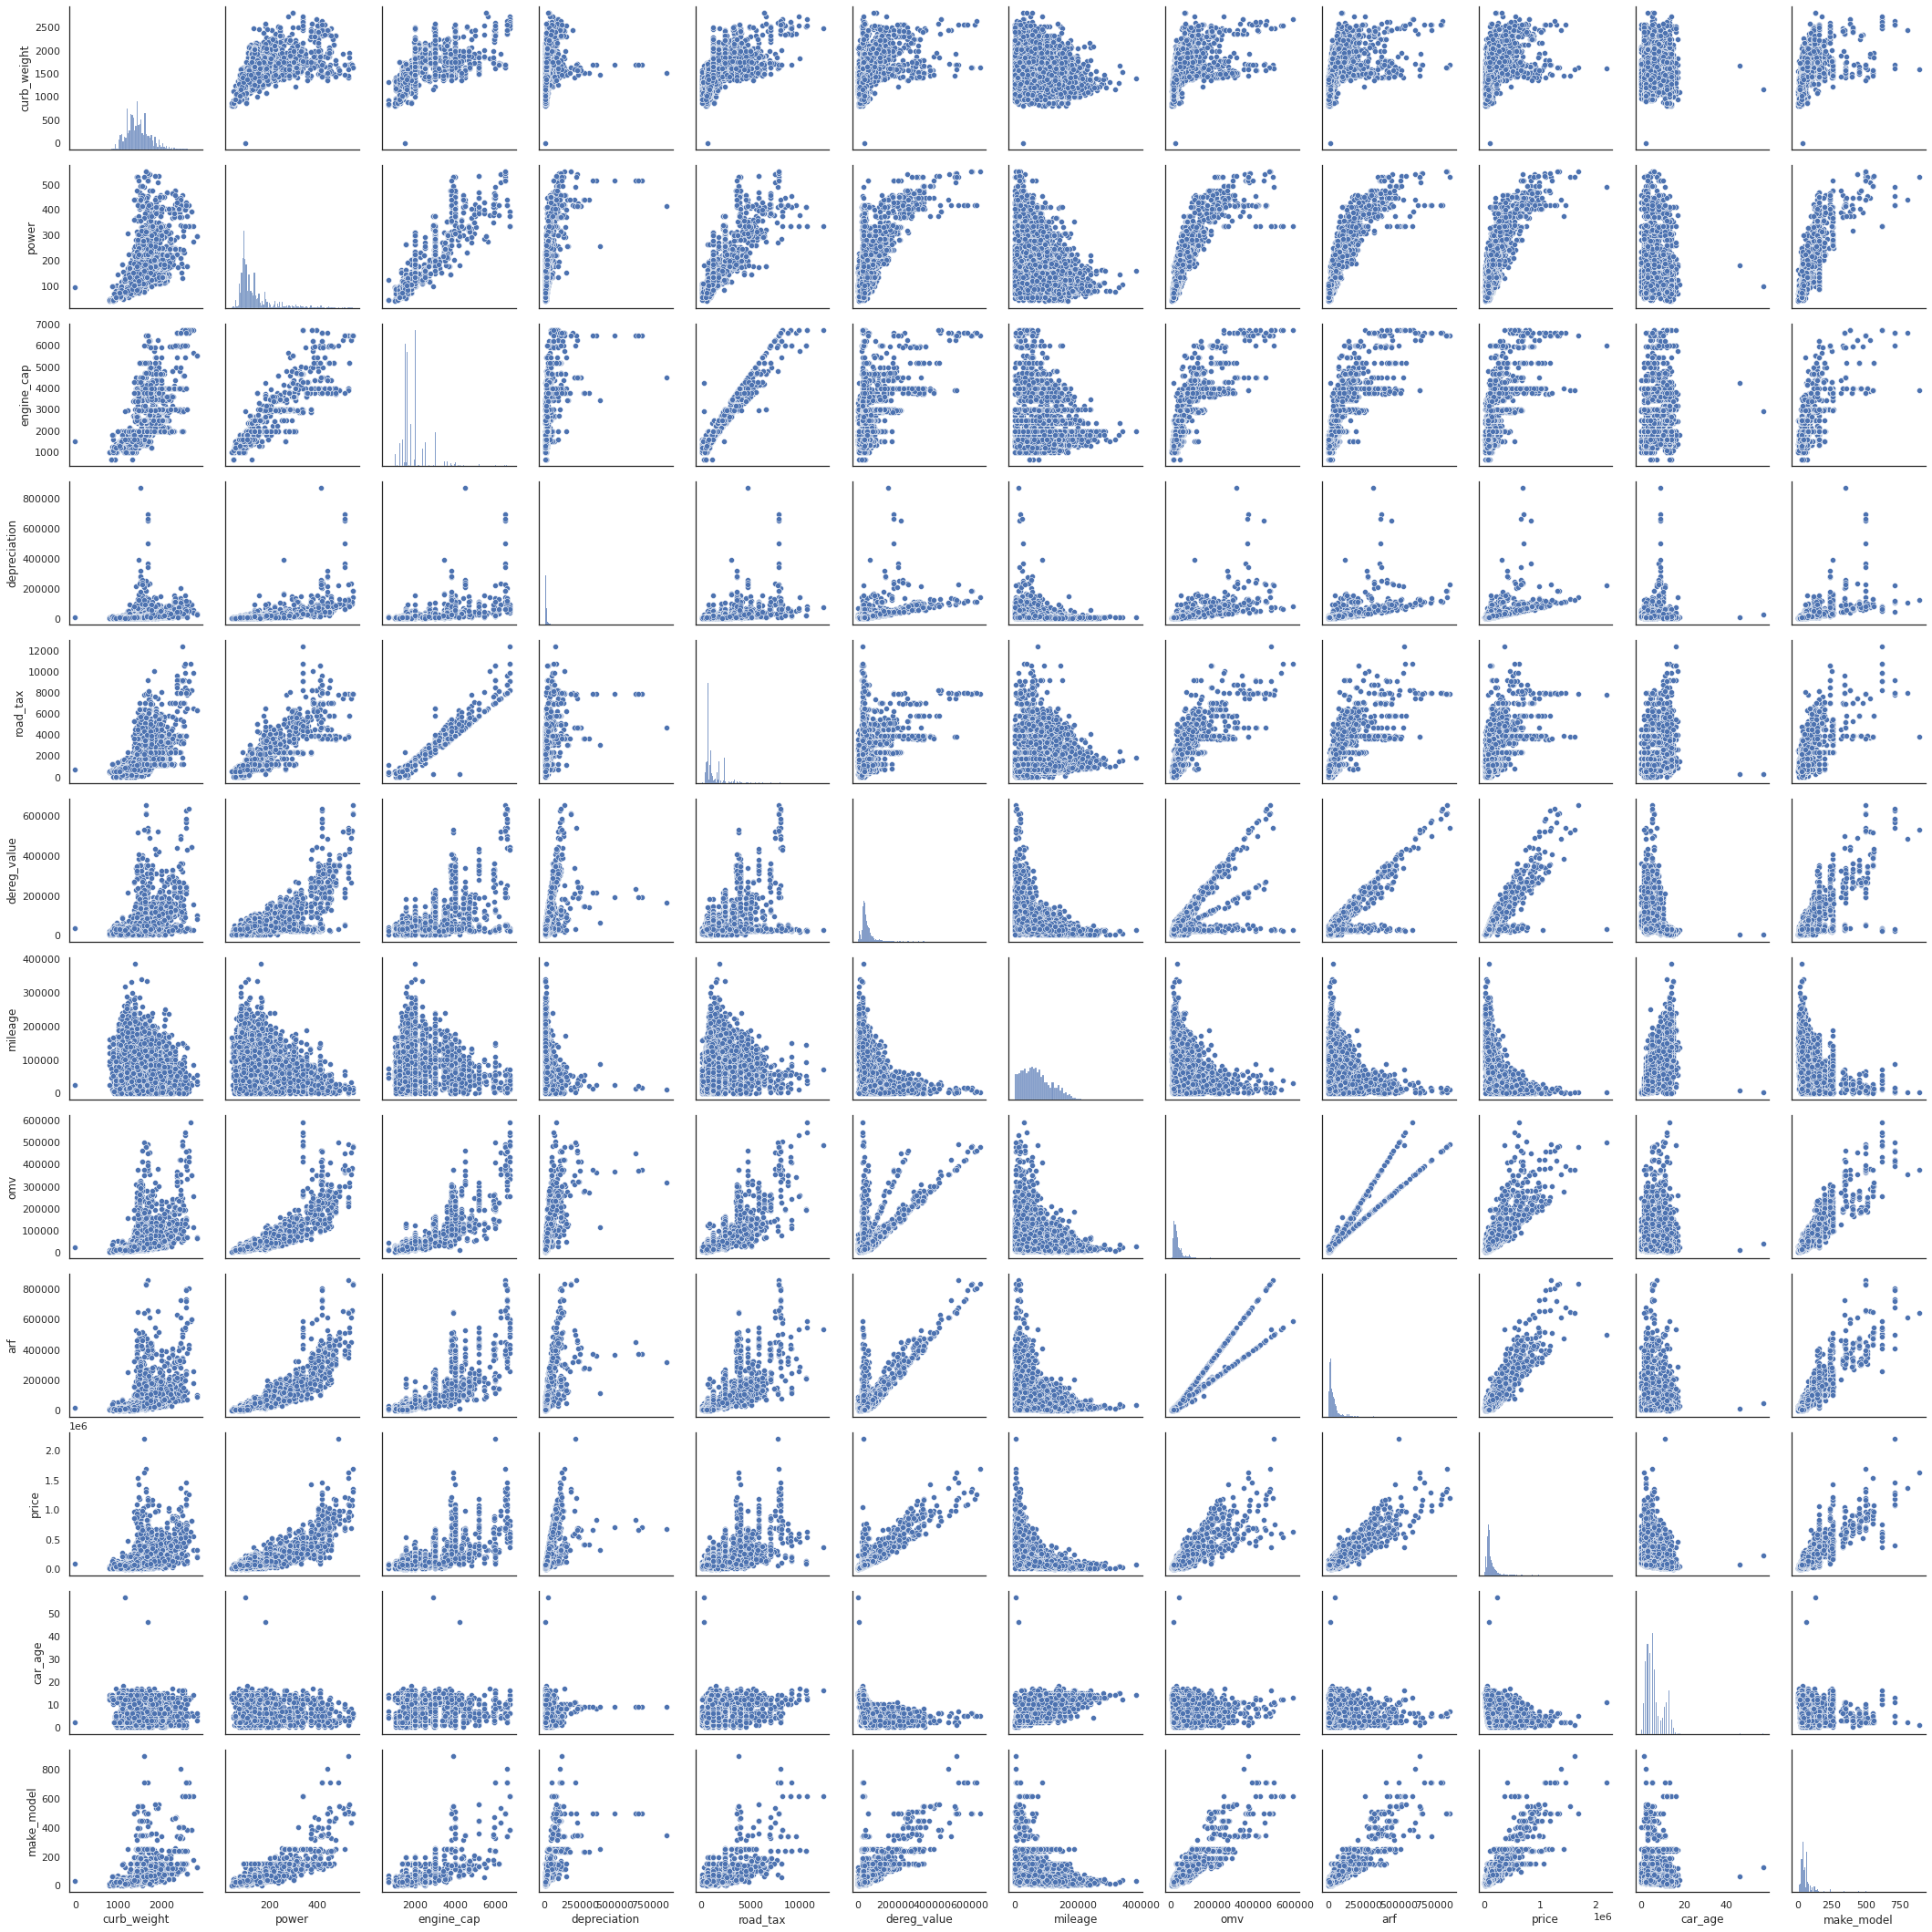

In [138]:
sns.pairplot(df_cl_1)

In [57]:
dt = pd.read_csv(const.TEST_PATH)

In [58]:
dt.isnull().sum()

listing_id              0
title                   0
make                  627
model                   0
description           111
manufactured           61
original_reg_date    4900
reg_date               61
type_of_vehicle         0
category                0
transmission            0
curb_weight           156
power                 675
fuel_type            3949
engine_cap             15
no_of_owners           56
depreciation          132
coe                   245
road_tax              634
dereg_value           335
mileage              1144
omv                    12
arf                    87
opc_scheme           4942
lifespan             4496
eco_category            0
features              127
accessories           841
indicative_price     5000
dtype: int64

In [64]:
r = df_cl_1[["arf","omv","mileage","dereg_value","price"]].values

In [113]:
df_cl_1 = cln.to_categorical_for_cols(df_cl_1)

In [114]:
df_cl_1.drop(columns=["category"],inplace=True)

In [117]:
df_cl_1.transmission = df_cl_1.transmission.map(const.TRANSMISSION_MAP)

In [115]:
df_cl_1.type_of_vehicle = df_cl_1.type_of_vehicle.apply(cln.vehicle_type_to_cat_num)
df_cl_1.type_of_vehicle = df_cl_1.type_of_vehicle.astype("category")

In [118]:
df_cl_1

,type_of_vehicle,transmission,curb_weight,power,engine_cap,depreciation,road_tax,dereg_value,mileage,omv,...,o,p,r,s,t,u,v,w,x,y
0,2,0.0,1560.0,135.0,1997.0,17700.0,1210.0,47514.0,73000.0,45330.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.0,1430.0,90.0,1595.0,15070.0,740.0,44517.0,80000.0,27886.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2,0.0,1635.0,115.0,1497.0,16400.0,684.0,80301.0,9800.0,46412.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,1237.0,92.0,1597.0,10450.0,742.0,36453.0,40000.0,20072.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,2,1.0,1422.0,84.6,1597.0,8160.0,1182.0,31713.0,9350.0,17980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16779,2,0.0,2053.0,187.0,1969.0,21720.0,1176.0,77443.0,64000.0,56261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16780,0,0.0,1370.0,103.6,1580.0,10770.0,732.0,34709.0,100808.0,27752.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16782,0,0.0,1030.0,73.0,1317.0,7940.0,578.0,33506.0,13000.0,15734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df_cl_1.values[:,:-1], df_cl_1.values[:,-1], test_size=0.33, random_state=42)

In [ ]:
df_cl

In [119]:
lr = RandomForestRegressor()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'mid-sized sedan'

In [93]:
lr.score(X_test, y_test)

0.9389277389259347

In [94]:
y_pred = lr.predict(X_test)

In [95]:
mean_squared_error(y_pred, y_test, squared=False)

28267.228154840515